 LOAN ELIGIBILITY PREDICTION MACHINE LEARNING MODEL

This Machine Learning Loan Eligibility Prediction model is designed to reduce loan defaults by leveraging advanced predictive analytics to assess the creditworthiness of applicants. This solution uses historical data on borrower demographics, income, loan amounts, repayment behavior, and other financial indicators to train predictive models. By identifying patterns and correlations within the data, this model can predict the likelihood of an applicant repaying their loan. This empowers financial institutions to make data-driven decisions, reducing the risk of defaults while ensuring fair access to credit. With features like automated risk scoring and tailored loan recommendations, the system not only enhances efficiency but also contributes to financial inclusivity and stability.

ADDING PACKAGES

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
#from google.colab import drive
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# DATA LOADING

In [50]:
 df = pd.read_csv('mydata.csv',nrows=120000)

C:\Users\shosholoza\AppData\Local\Temp\ipykernel_7756\2390288911.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('mydata.csv',nrows=120000)


Displaying 5 five rows of the data

In [51]:
df.head()

,Status,Gender,Age,Dependents,Income,LoanAmount,Collateral,Term,Rate,LoanType
0,1,F,35.00,1,406597.50,2470050.00,3510000.00,12,9.30,yEnterprise
1,1,M,29.00,1,1293502.50,3569850.00,11295000.00,6,9.30,yEnterprise
2,0,F,44.00,0,135000.00,6150000.00,8350000.00,6,10.30,wEnterprise
3,1,F,45.00,2,312682.50,2968650.00,2970000.00,6,10.30,wEnterprise
4,1,M,54.00,3,513000.00,2186550.00,6230000.00,9,9.30,mEnterprise


Data discription

In [52]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Status      120000 non-null  object 
 1   Gender      120000 non-null  object 
 2   Age         119974 non-null  float64
 3   Dependents  119974 non-null  object 
 4   Income      120000 non-null  float64
 5   LoanAmount  119993 non-null  float64
 6   Collateral  119903 non-null  float64
 7   Term        120000 non-null  object 
 8   Rate        119185 non-null  float64
 9   LoanType    119185 non-null  object 
dtypes: float64(5), object(5)
memory usage: 9.2+ MB


(120000, 10)

EDA & DATA CLEANING

Distribution of features

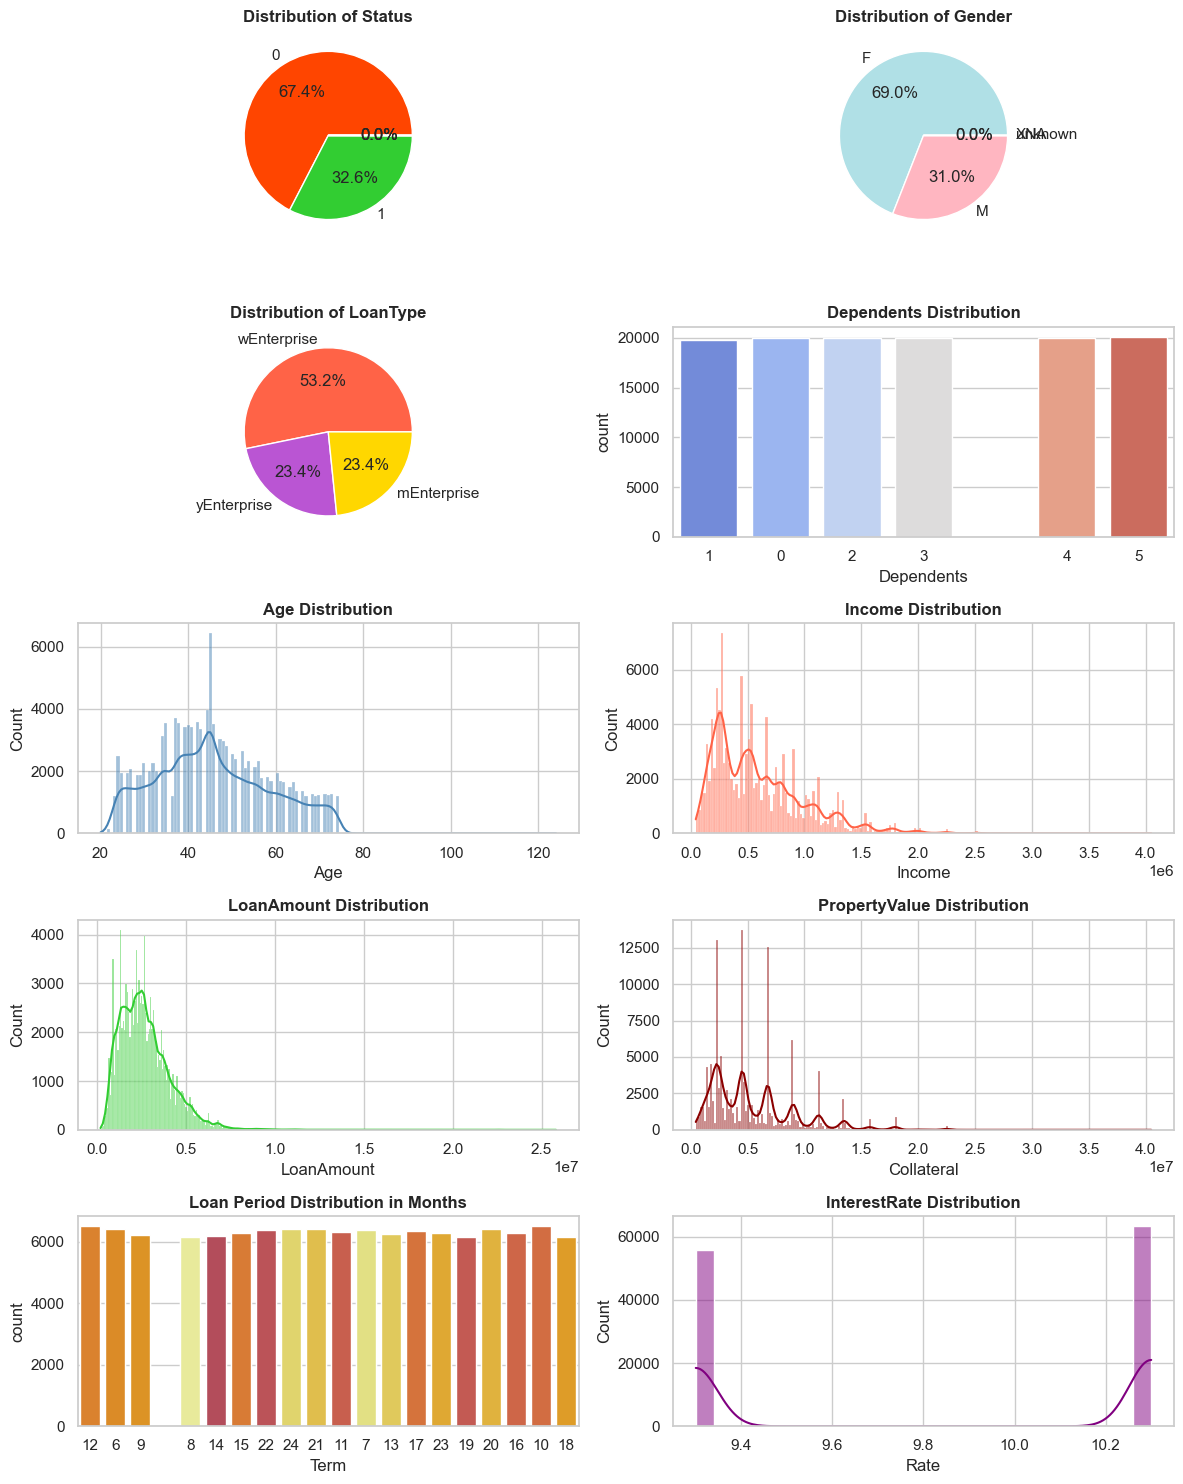

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="muted")

# Customising colour
custom_palette = ['#8B0000', '#800080', '#4682B4', '#FF69B4', '#FFD700', '#32CD32']


# Categorical Features: Status, Gender, LoanType
fig, axes = plt.subplots(5, 2, figsize=(12, 15))

# Pie Chart for Status
status_counts = df['Status'].value_counts()
axes[0, 0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['#FF4500', '#32CD32'])
axes[0, 0].set_title('Distribution of Status', fontsize=12, fontweight="bold")
axes[0, 0].set_aspect('equal')

# Pie Chart for Gender
gender_counts = df['Gender'].value_counts()
axes[0, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#B0E0E6', '#FFB6C1'])
axes[0, 1].set_title('Distribution of Gender', fontsize=12, fontweight="bold")
axes[0, 1].set_aspect('equal')

# Pie Chart for LoanType
loan_type_counts = df['LoanType'].value_counts()
axes[1, 0].pie(loan_type_counts, labels=loan_type_counts.index, autopct='%1.1f%%', colors=['#FF6347', '#BA55D3', '#FFD700'])
axes[1, 0].set_title('Distribution of LoanType', fontsize=12, fontweight="bold")
axes[1, 0].set_aspect('equal')

# Categorical Feature: Dependents
sns.countplot(x='Dependents', data=df, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Dependents Distribution', fontsize=12, fontweight="bold")

# Numerical Features: Age Distribution
sns.histplot(df['Age'], kde=True, color='#4682B4', ax=axes[2, 0])
axes[2, 0].set_title('Age Distribution', fontsize=12, fontweight="bold")

# Income Distribution
sns.histplot(df['Income'], kde=True, color='#FF6347', ax=axes[2, 1])
axes[2, 1].set_title('Income Distribution', fontsize=12, fontweight="bold")

# LoanAmount Distribution
sns.histplot(df['LoanAmount'], kde=True, color='#32CD32', ax=axes[3, 0])
axes[3, 0].set_title('LoanAmount Distribution', fontsize=12, fontweight="bold")

# PropertyValue (Collateral) Distribution
sns.histplot(df['Collateral'], kde=True, color='#8B0000', ax=axes[3, 1])
axes[3, 1].set_title('PropertyValue Distribution', fontsize=12, fontweight="bold")

# LoanPeriod Distribution
sns.countplot(x='Term', data=df, palette='inferno', ax=axes[4, 0])
axes[4, 0].set_title('Loan Period Distribution in Months', fontsize=12, fontweight="bold")

# InterestRate Distribution
sns.histplot(df['Rate'], kde=True, color='#800080', ax=axes[4, 1])
axes[4, 1].set_title('InterestRate Distribution', fontsize=12, fontweight="bold")

# Adjust layout and show all plots
plt.tight_layout()
plt.show()


Checking data type

In [54]:
df.dtypes

Status         object
Gender         object
Age           float64
Dependents     object
Income        float64
LoanAmount    float64
Collateral    float64
Term           object
Rate          float64
LoanType       object
dtype: object

Converting data types

In [55]:
#Converting to float
df['Age']=pd.to_numeric(df['Age'], errors='coerce')
df['LoanAmount']=pd.to_numeric(df['LoanAmount'], errors='coerce')
df['Income']=pd.to_numeric(df['Income'], errors='coerce')
df['Collateral']=pd.to_numeric(df['Collateral'], errors='coerce')
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

In [56]:
#Converting to integer
import numpy as np

def convert_to_int(value):
    try:
        numeric_value = pd.to_numeric(value, errors='coerce')
        if pd.isna(numeric_value):
            return np.nan
        return int(numeric_value)
    except (ValueError, TypeError):
        return np.nan


Identifyin non-numeric values in 'Status'

In [57]:
non_numeric_values = df['Status'][pd.to_numeric(df['Status'], errors='coerce').isna()]
print(non_numeric_values.head())

7         
10        
19        
21        
27310     
Name: Status, dtype: object


In [58]:
# Selecting  all columns and find unique values for each
unique_values = {col: df[col].unique() for col in ['Status', 'Gender', 'Age', 'Income', 'LoanAmount', 'Collateral', 'Term', 'Rate', 'LoanType']}
print(unique_values)


{'Status': array(['1', '0', ' ', '   ', '  '], dtype=object), 'Gender': array(['F', 'M', 'unknown', 'XNA'], dtype=object), 'Age': array([ 35.,  29.,  44.,  45.,  54.,  42.,  39.,  32.,  65.,  46.,  23.,
        68.,  33.,  38.,  57.,  51.,  58.,  24.,  28.,  31.,  70.,  62.,
        48.,  60.,  43.,  56.,  71.,  41.,  73.,  52.,  27.,  37.,  47.,
        40.,  34.,  30.,  55.,  49.,  25.,  64.,  59.,  61.,  53.,  63.,
        26.,  50.,  67.,  74.,  66.,  72.,  69.,  36.,  22.,  21.,  20.,
        nan,  75., 124.,  76.]), 'Income': array([ 406597.5, 1293502.5,  135000. , ...,  645592.5,  428994. ,
        105813. ]), 'LoanAmount': array([2470050., 3569850., 6150000., ..., 5897700.,  771750.,  850950.]), 'Collateral': array([ 3510000., 11295000.,  8350000.,  2970000.,  6230000.,  4545000.,
       13950000., 13300000.,  9135000.,  4070000.,  6525000.,  1350000.,
         675000.,  6975000.,  6795000.,  2475000.,  3870000.,  2700000.,
        1575000.,  4275000.,  9270000.,  4500000.,  22

In [59]:
df['Status'] = df['Status'].astype(str)
df['Status'] = df['Status'].str.strip()
df['Status'].replace('', np.nan, inplace=True)

Identfying unique values in Status

In [60]:
unique_values = df['Status'].unique()
print(unique_values)


['1' '0' nan]


Replacing spaces and other non-numeric values with NaN and then filling them with a default value

In [61]:
df['Status'] = pd.to_numeric(df['Status'], errors='coerce').fillna(0)

Verification

In [62]:
unique_values = df['Status'].unique()
print(unique_values)

[1. 0.]


In [63]:
print(df['Gender'].unique())


['F' 'M' 'unknown' 'XNA']


Removing unique values in Gender

In [64]:
# Remove rows where Gender is 'unknown', 'XNA', or 'Unspecified'
df = df[~df['Gender'].isin(['unknown', 'XNA'])]

# Checking the unique values in Gender after filtering
print(df['Gender'].unique())



['F' 'M']


Converting Values

In [65]:
df['Term'] = df['Term'].apply(convert_to_int)
df['Dependents'] = df['Dependents'].apply(convert_to_int)
df['Age'] =  df['Age'].apply(convert_to_int)
df['Status'] =  df['Status'].apply(convert_to_int)

In [66]:
df.head()

,Status,Gender,Age,Dependents,Income,LoanAmount,Collateral,Term,Rate,LoanType
0,1,F,35.00,1.00,406597.50,2470050.00,3510000.00,12.00,9.30,yEnterprise
1,1,M,29.00,1.00,1293502.50,3569850.00,11295000.00,6.00,9.30,yEnterprise
2,0,F,44.00,0.00,135000.00,6150000.00,8350000.00,6.00,10.30,wEnterprise
3,1,F,45.00,2.00,312682.50,2968650.00,2970000.00,6.00,10.30,wEnterprise
4,1,M,54.00,3.00,513000.00,2186550.00,6230000.00,9.00,9.30,mEnterprise


In [67]:
df['Term'] = pd.to_numeric(df['Term'], errors='coerce')
df['Term'] = df['Term'].fillna(0).astype('Int64')


Verifying data types

In [68]:
df.dtypes

Status          int64
Gender         object
Age           float64
Dependents    float64
Income        float64
LoanAmount    float64
Collateral    float64
Term            Int64
Rate          float64
LoanType       object
dtype: object

Handling missing values

In [69]:
df.isnull().sum()

Status          0
Gender          0
Age            10
Dependents     59
Income          0
LoanAmount      7
Collateral     97
Term            0
Rate          814
LoanType      814
dtype: int64

Percentages of missing values

In [70]:
missing_values = df.isna().sum().iloc[1:]
total_entries = len(df)
values = (missing_values / total_entries) * 100

print(values)

Gender       0.00
Age          0.01
Dependents   0.05
Income       0.00
LoanAmount   0.01
Collateral   0.08
Term         0.00
Rate         0.68
LoanType     0.68
dtype: float64


Dealing with missing values by dropping affected columns

In [71]:
df = df.dropna(axis=0)
df.isnull().sum()

Status        0
Gender        0
Age           0
Dependents    0
Income        0
LoanAmount    0
Collateral    0
Term          0
Rate          0
LoanType      0
dtype: int64

Identifying duplicates & Display the total number of duplicates

In [72]:
duplicates = df.duplicated()
print(f"Total duplicates: {duplicates.sum()}")

Total duplicates: 1006


Removing duplicates

In [73]:
df_cleaned = df.drop_duplicates()
print(f"After removing duplicates, total rows: {df_cleaned.shape[0]}")


After removing duplicates, total rows: 117995


I dentifying Outliers Using IQR

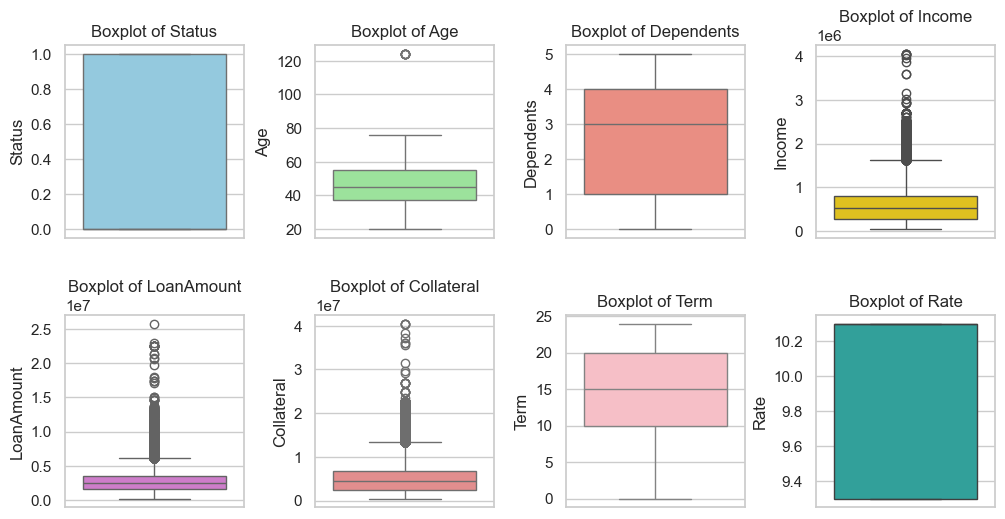

In [74]:

numerical_columns = df_cleaned.select_dtypes(include='number').columns[:10]

colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid',
          'lightcoral', 'lightpink', 'lightseagreen', 'wheat', 'plum']

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i, (col, ax) in enumerate(zip(numerical_columns, axes.flat)):
    sns.boxplot(data=df_cleaned, y=col, ax=ax, color=colors[i])
    ax.set_title(f'Boxplot of {col}')

# SavIing and displaying the plot
plt.savefig('boxplots_Outlier.png', dpi=300)
plt.show()



Handling outlirs by capping method

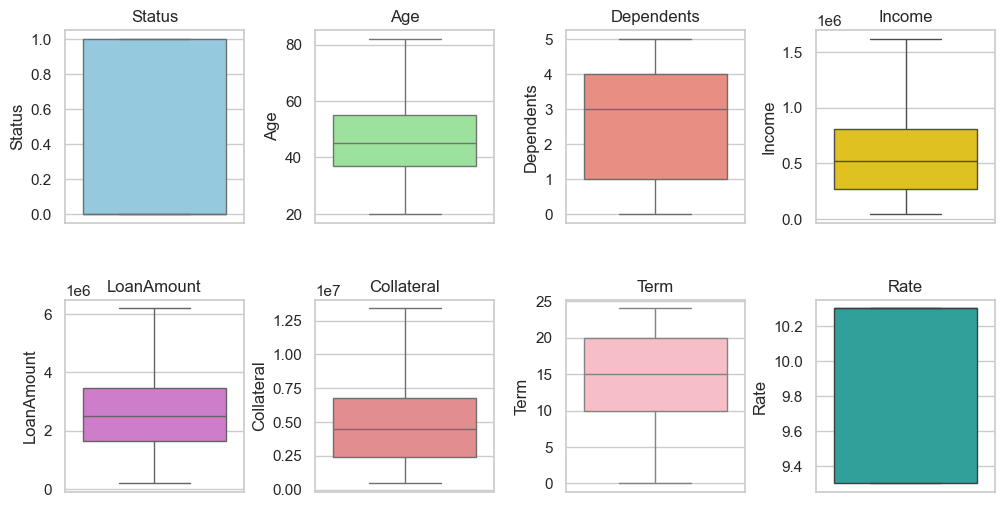

In [75]:

import matplotlib.pyplot as plt

# Ensure we're working on a copy of the original dataframe if needed
df_cleaned_copy = df_cleaned.copy()

# Defining colours for each box plot
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid',
          'lightcoral', 'lightpink', 'lightseagreen']

# Selecting numerical columns for plotting
numerical_columns = df_cleaned_copy.select_dtypes(include='number').columns[:8]

# Capping the outliers
for column in numerical_columns:
    # Convert to float to avoid TypeError
    df_cleaned_copy[column] = df_cleaned_copy[column].astype(float)

    Q1, Q3 = df_cleaned_copy[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the values using .loc[] to avoid SettingWithCopyWarning
    df_cleaned_copy.loc[:, column] = df_cleaned_copy[column].clip(lower=lower_bound, upper=upper_bound)

# Create subplots for box plots after capping
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Looping through the numerical columns and plot box plots
for i, (col, ax) in enumerate(zip(numerical_columns, axes.flat)):
    sns.boxplot(data=df_cleaned_copy, y=col, ax=ax, color=colors[i])
    ax.set_title(f'{col}')
    ax.set_ylabel(col)

# Saving and showing the plot
plt.savefig('Outlier_removal_boxplots_capped.png', dpi=300)
plt.show()


In [76]:
df_cleaned = df_cleaned_copy

In [77]:
import pandas as pd

pd.set_option('display.float_format', '{:.2f}'.format)
df_cleaned.describe()


,Status,Age,Dependents,Income,LoanAmount,Collateral,Term,Rate
count,117995.00,117995.00,117995.00,117995.00,117995.00,117995.00,117995.00,117995.00
mean,0.33,45.91,2.50,594111.79,2686122.85,5291383.49,15.00,9.83
std,0.47,12.98,1.71,380682.40,1327147.00,3377617.17,5.49,0.50
min,0.00,20.00,0.00,45000.00,198000.00,450000.00,0.00,9.30
25%,0.00,37.00,1.00,270000.00,1658700.00,2385000.00,10.00,9.30
50%,0.00,45.00,3.00,517500.00,2493900.00,4500000.00,15.00,10.30
75%,1.00,55.00,4.00,808650.00,3469050.00,6795000.00,20.00,10.30
max,1.00,82.00,5.00,1616625.00,6184575.00,13410000.00,24.00,10.30


Distributions after preprocessing

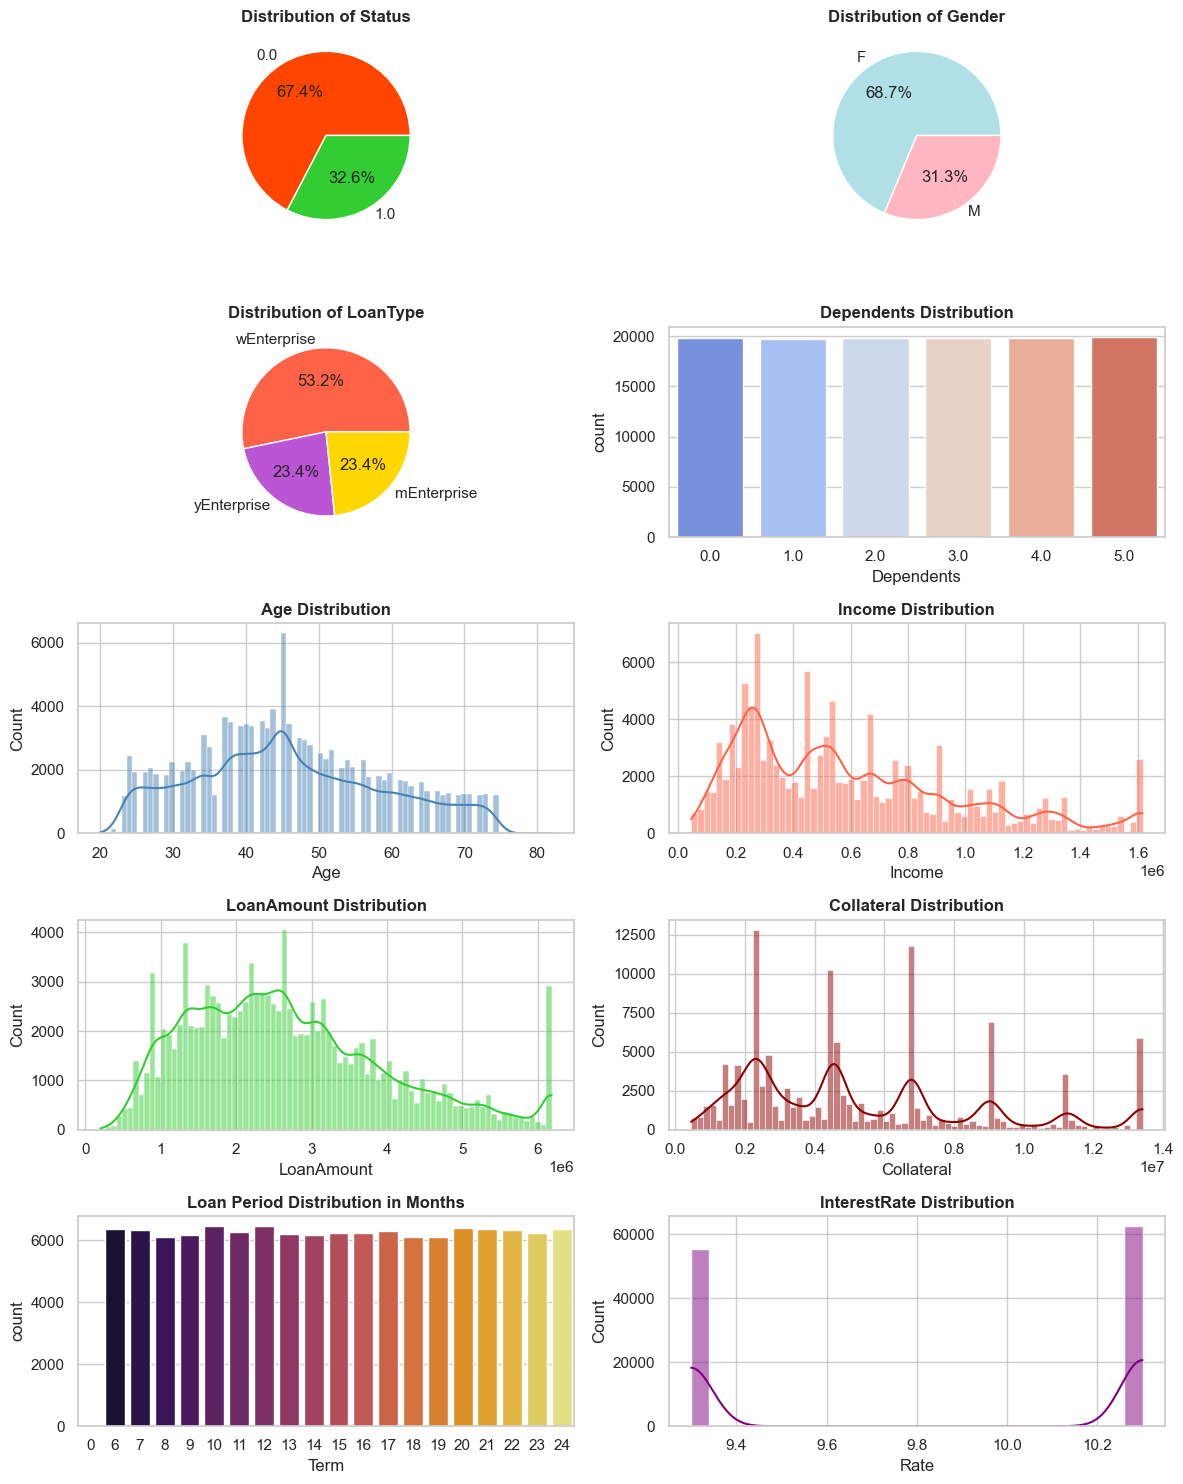

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots to make them more visually appealing
sns.set_theme(style="whitegrid", palette="muted")

# Custom color palette
custom_palette = ['#8B0000', '#800080', '#4682B4', '#FF69B4', '#FFD700', '#32CD32']

# Categorical Features: Status, Gender, LoanType

# Create a 5x2 grid of subplots (5 rows, 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(12, 15))

# Pie Chart for Status
status_counts = df_cleaned['Status'].value_counts()
axes[0, 0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['#FF4500', '#32CD32'])
axes[0, 0].set_title('Distribution of Status', fontsize=12, fontweight="bold")
axes[0, 0].set_aspect('equal')

# Pie Chart for Gender
gender_counts = df_cleaned['Gender'].value_counts()
axes[0, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#B0E0E6', '#FFB6C1'])
axes[0, 1].set_title('Distribution of Gender', fontsize=12, fontweight="bold")
axes[0, 1].set_aspect('equal')

# Pie Chart for LoanType
loan_type_counts = df['LoanType'].value_counts()
axes[1, 0].pie(loan_type_counts, labels=loan_type_counts.index, autopct='%1.1f%%', colors=['#FF6347', '#BA55D3', '#FFD700'])
axes[1, 0].set_title('Distribution of LoanType', fontsize=12, fontweight="bold")
axes[1, 0].set_aspect('equal')

# Categorical Feature: Dependents
sns.countplot(x='Dependents', data=df, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Dependents Distribution', fontsize=12, fontweight="bold")

# Numerical Features: Age Distribution
sns.histplot(df_cleaned['Age'], kde=True, color='#4682B4', ax=axes[2, 0])
axes[2, 0].set_title('Age Distribution', fontsize=12, fontweight="bold")

# Income Distribution
sns.histplot(df_cleaned['Income'], kde=True, color='#FF6347', ax=axes[2, 1])
axes[2, 1].set_title('Income Distribution', fontsize=12, fontweight="bold")

# LoanAmount Distribution
sns.histplot(df_cleaned['LoanAmount'], kde=True, color='#32CD32', ax=axes[3, 0])
axes[3, 0].set_title('LoanAmount Distribution', fontsize=12, fontweight="bold")

# Collateral (Collateral) Distribution
sns.histplot(df_cleaned['Collateral'], kde=True, color='#8B0000', ax=axes[3, 1])
axes[3, 1].set_title('Collateral Distribution', fontsize=12, fontweight="bold")

# Term Distribution
sns.countplot(x='Term', data=df, palette='inferno', ax=axes[4, 0])
axes[4, 0].set_title('Loan Period Distribution in Months', fontsize=12, fontweight="bold")

# Rate Distribution
sns.histplot(df_cleaned['Rate'], kde=True, color='#800080', ax=axes[4, 1])
axes[4, 1].set_title('InterestRate Distribution', fontsize=12, fontweight="bold")

# Adjust layout and show all plots
plt.tight_layout()
plt.show()


FEATURE ENGINEERING

Encoding using one-hot encoding

In [79]:
df_cleaned.columns = df_cleaned.columns.str.strip()
df_cleaned = pd.get_dummies(df_cleaned, columns=['Gender', 'LoanType'], drop_first=False)

Index(['Status', 'Gender', 'Age', 'Dependents', 'Income', 'LoanAmount',
       'Collateral', 'Term', 'Rate', 'LoanType'],
      dtype='object')


In [80]:
df_cleaned.head()

,Status,Age,Dependents,Income,LoanAmount,Collateral,Term,Rate,Gender_F,Gender_M,LoanType_mEnterprise,LoanType_wEnterprise,LoanType_yEnterprise
0,1.00,35.00,1.00,406597.50,2470050.00,3510000.00,12.00,9.30,True,False,False,False,True
1,1.00,29.00,1.00,1293502.50,3569850.00,11295000.00,6.00,9.30,False,True,False,False,True
2,0.00,44.00,0.00,135000.00,6150000.00,8350000.00,6.00,10.30,True,False,False,True,False
3,1.00,45.00,2.00,312682.50,2968650.00,2970000.00,6.00,10.30,True,False,False,True,False
4,1.00,54.00,3.00,513000.00,2186550.00,6230000.00,9.00,9.30,False,True,True,False,False


Renaming columns

In [81]:
df_cleaned.rename(columns={
    'Gender_F': 'Female',
    'Gender_M': 'Male',
    'LoanType_mEnterprise': 'MensEnterprise',
    'LoanType_wEnterprise': 'WEnterprise',
    'LoanType_yEnterprise': 'yEnterprise'
}, inplace=True)

df_cleaned.head()

,Status,Age,Dependents,Income,LoanAmount,Collateral,Term,Rate,Female,Male,MensEnterprise,WEnterprise,yEnterprise
0,1.00,35.00,1.00,406597.50,2470050.00,3510000.00,12.00,9.30,True,False,False,False,True
1,1.00,29.00,1.00,1293502.50,3569850.00,11295000.00,6.00,9.30,False,True,False,False,True
2,0.00,44.00,0.00,135000.00,6150000.00,8350000.00,6.00,10.30,True,False,False,True,False
3,1.00,45.00,2.00,312682.50,2968650.00,2970000.00,6.00,10.30,True,False,False,True,False
4,1.00,54.00,3.00,513000.00,2186550.00,6230000.00,9.00,9.30,False,True,True,False,False


Changing encoded columns to numeric

In [82]:
# Converting specified columns to binary (0 for False, 1 for True)
binary_columns = ['Male', 'WEnterprise','yEnterprise','Female','MensEnterprise']

for col in binary_columns:
    df_cleaned[col] = df_cleaned[col].replace({True: 1, False: 0})

# Checking the changes
print(df_cleaned[binary_columns].head())


   Male  WEnterprise  yEnterprise  Female  MensEnterprise
0     0            0            1       1               0
1     1            0            1       0               0
2     0            1            0       1               0
3     0            1            0       1               0
4     1            0            0       0               1


Changing Status column to int

In [83]:
# Convert the 'Status' column to integer type
df_cleaned['Status'] = df_cleaned['Status'].astype(int)

# Verify the change
print(df_cleaned.dtypes)


Status              int32
Age               float64
Dependents        float64
Income            float64
LoanAmount        float64
Collateral        float64
Term              float64
Rate              float64
Female              int64
Male                int64
MensEnterprise      int64
WEnterprise         int64
yEnterprise         int64
dtype: object


Standadisation using standard scaller

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Income', 'LoanAmount', 'Collateral','Age','Term','Rate']
df_cleaned[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])
df_cleaned.head()

,Status,Age,Dependents,Income,LoanAmount,Collateral,Term,Rate,Female,Male,MensEnterprise,WEnterprise,yEnterprise
0,1,-0.84,1.00,-0.49,-0.16,-0.53,-0.55,-1.06,1,0,0,0,1
1,1,-1.30,1.00,1.84,0.67,1.78,-1.64,-1.06,0,1,0,0,1
2,0,-0.15,0.00,-1.21,2.61,0.91,-1.64,0.94,1,0,0,1,0
3,1,-0.07,2.00,-0.74,0.21,-0.69,-1.64,0.94,1,0,0,1,0
4,1,0.62,3.00,-0.21,-0.38,0.28,-1.09,-1.06,0,1,1,0,0


FEATURE IMPORTANCE

ANOVA Test

In [85]:

from scipy import stats

df_cleaned = df_cleaned.dropna(subset=['Status'])

numerical_columns = ['Income', 'LoanAmount', 'Dependents', 'Age']

for column in numerical_columns:
    grouped_data = [group[column].values for name, group in df_cleaned.groupby('Status')]

    anova_result = stats.f_oneway(*grouped_data)

    print(f"\nANOVA results for {column}:")
    print('F-statistic:', anova_result.statistic)
    print('p-value:', anova_result.pvalue)

    if anova_result.pvalue < 0.05:
        print(f"There is a significant difference in {column} between the different Status groups.")
    else:
        print(f"There is no significant difference in {column} between the different Status groups.")



ANOVA results for Income:
F-statistic: 12460.642008698744
p-value: 0.0
There is a significant difference in Income between the different Status groups.

ANOVA results for LoanAmount:
F-statistic: 256.1229866565539
p-value: 1.381597181403783e-57
There is a significant difference in LoanAmount between the different Status groups.

ANOVA results for Dependents:
F-statistic: 0.004941854205511117
p-value: 0.9439563364721398
There is no significant difference in Dependents between the different Status groups.

ANOVA results for Age:
F-statistic: 1.2168181007418404
p-value: 0.2699882558707398
There is no significant difference in Age between the different Status groups.


Coralation using hitmap

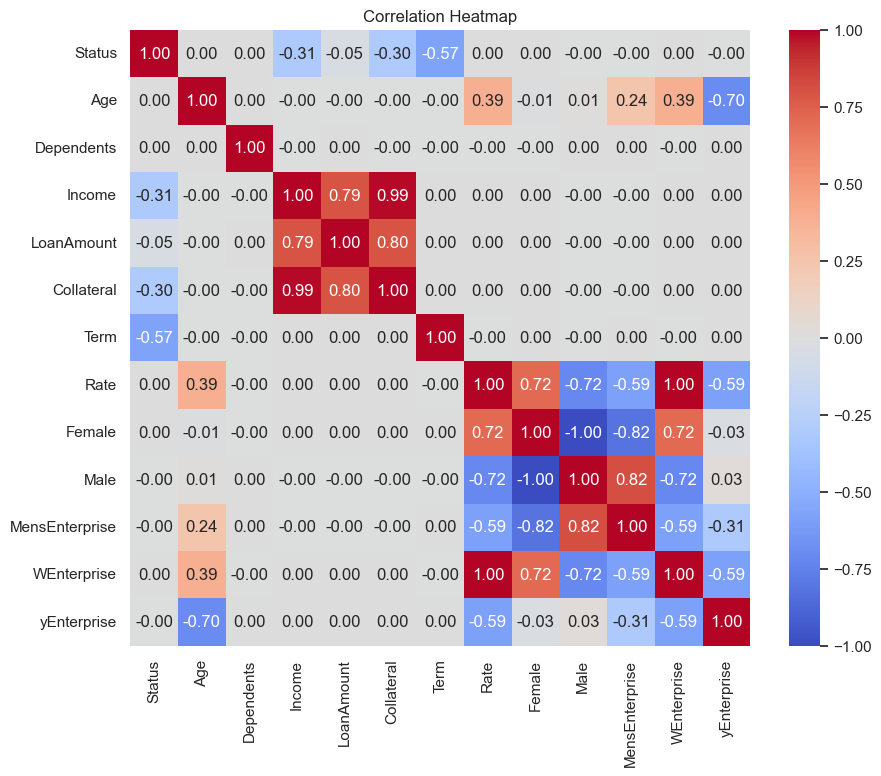

In [86]:
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Heatmap')
plt.savefig('Collaration_Matrix.png', dpi=300)  # Save as a high-resolution image

plt.show()

Resampling random undersampler

Balancing Stutus

In [87]:
!pip install imbalanced-learn


Original Status Distribution:
Status
0    79501
1    38494
Name: count, dtype: int64
Resampled Status Distribution:
Status
0    38494
1    38494
Name: count, dtype: int64


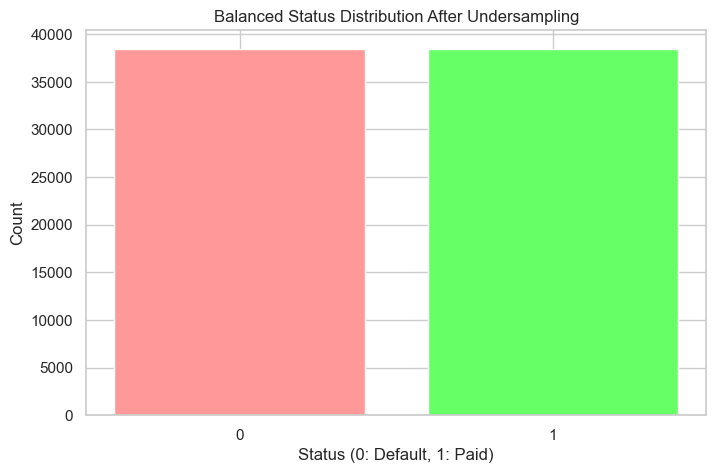

In [88]:
from imblearn.under_sampling import RandomUnderSampler
print("Original Status Distribution:")
print(df_cleaned['Status'].value_counts())
# Preparing the feature set and target variable
X = df_cleaned.drop(columns=['Status'])  
y = df_cleaned['Status']
# Undersample the majority class (Status == 0)
undersampler = RandomUnderSampler(sampling_strategy={0: df_cleaned['Status'].value_counts()[1]}, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
# Creating a new DataFrame for the resampled data
df_cleaned_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_cleaned_resampled['Status'] = y_resampled
# Checking the distribution of the resampled Status
print("Resampled Status Distribution:")
print(df_cleaned_resampled['Status'].value_counts())
# Plotting the distribution of Status after undersampling
status_counts_resampled = df_cleaned_resampled['Status'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(status_counts_resampled.index.astype(str), status_counts_resampled.values, color=['#ff9999', '#66ff66'])
plt.title('Balanced Status Distribution After Undersampling')
plt.xlabel('Status (0: Default, 1: Paid)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [89]:
df_cleaned_resampled.shape

(76988, 13)

Permutation feature importance

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Defining the models with their parameters
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None),
    'SVM': SVC(random_state=42, probability=True, kernel='rbf', C=1.0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3),
    'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
}


In [91]:
from sklearn.model_selection import train_test_split

X = df_cleaned_resampled.drop(columns=['Status']) 
y = df_cleaned_resampled['Status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training and testing data split completed.")


Training and testing data split completed.


In [ ]:
Visualisation using bargraph

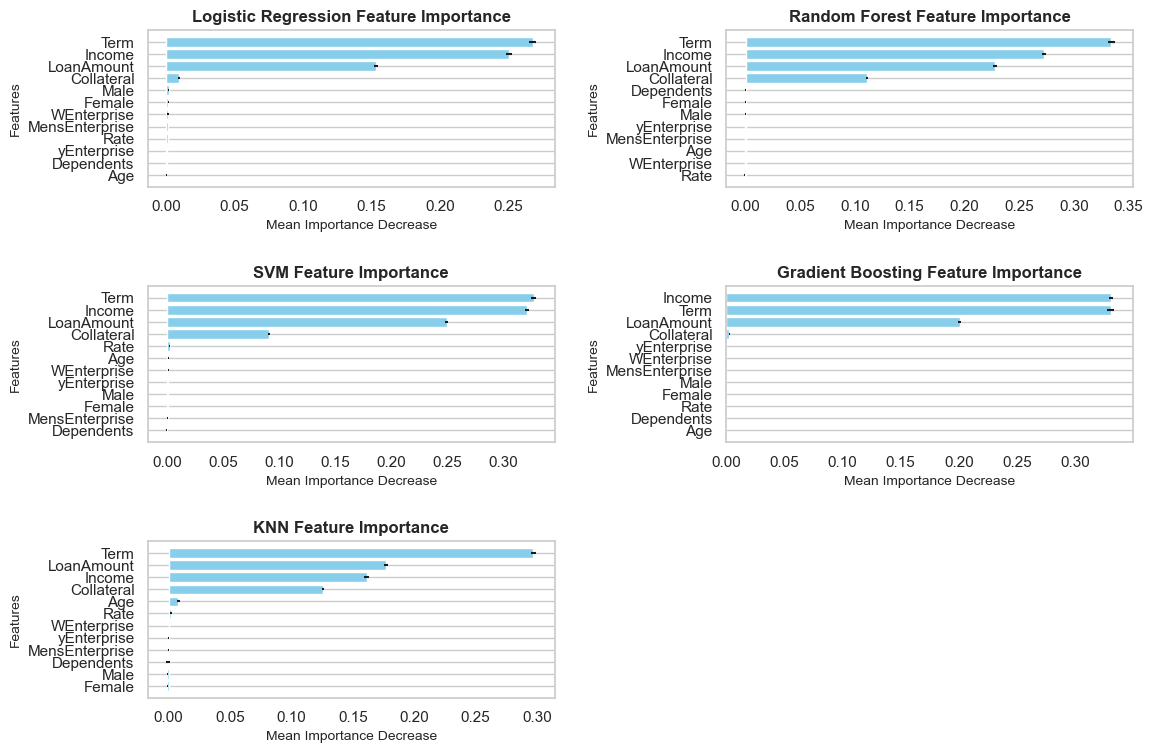

In [92]:

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),  
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Create a 3x2 grid for the plots
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()  
# Looping through the models and plot their feature importances
for i, (model_name, model) in enumerate(models.items()):
    # Training the model
    model.fit(X_train, y_train)  
    # Permutation feature importance
    perm_importance = permutation_importance(
        model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy'
    )
    # Sorting the indices of features by importance
    sorted_idx = np.argsort(perm_importance.importances_mean)
    # Plot the feature importances
    ax = axes[i]
    ax.barh(
        X_test.columns[sorted_idx],
        perm_importance.importances_mean[sorted_idx],
        xerr=perm_importance.importances_std[sorted_idx],
        color='skyblue', align='center'
    )
    ax.set_title(f"{model_name} Feature Importance", fontsize=12, fontweight="bold")
    ax.set_xlabel("Mean Importance Decrease", fontsize=10)
    ax.set_ylabel("Features", fontsize=10)
    ax.grid(axis='x')

# Removing the 6th subplot (since there are only 5 models)
fig.delaxes(axes[-1])
# Adjusting layout for better spacing
plt.tight_layout(pad=2.0)  # Slightly reduced padding
# Save the figure as a PNG file
plt.savefig("permutation_feature_importances.png", format="png", dpi=300)
# Display the figure
plt.show()


Dropping features with less impact

In [93]:
df_cleaned_resampled.drop(columns=['WEnterprise','yEnterprise','Dependents','MensEnterprise'], inplace=True)


Displaying remaining features

In [1]:
df_cleaned_resampled.describe()

NameError: name 'df_cleaned_resampled' is not defined

MODEL TRAINING AND SELECTION

In [95]:
from sklearn.model_selection import train_test_split

X = df_cleaned_resampled.drop('Status', axis=1)
y = df_cleaned_resampled['Status']
#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (53891, 8)
Testing Features Shape: (23097, 8)
Training Labels Shape: (53891,)
Testing Labels Shape: (23097,)


Importing libraries

In [96]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

Model Training

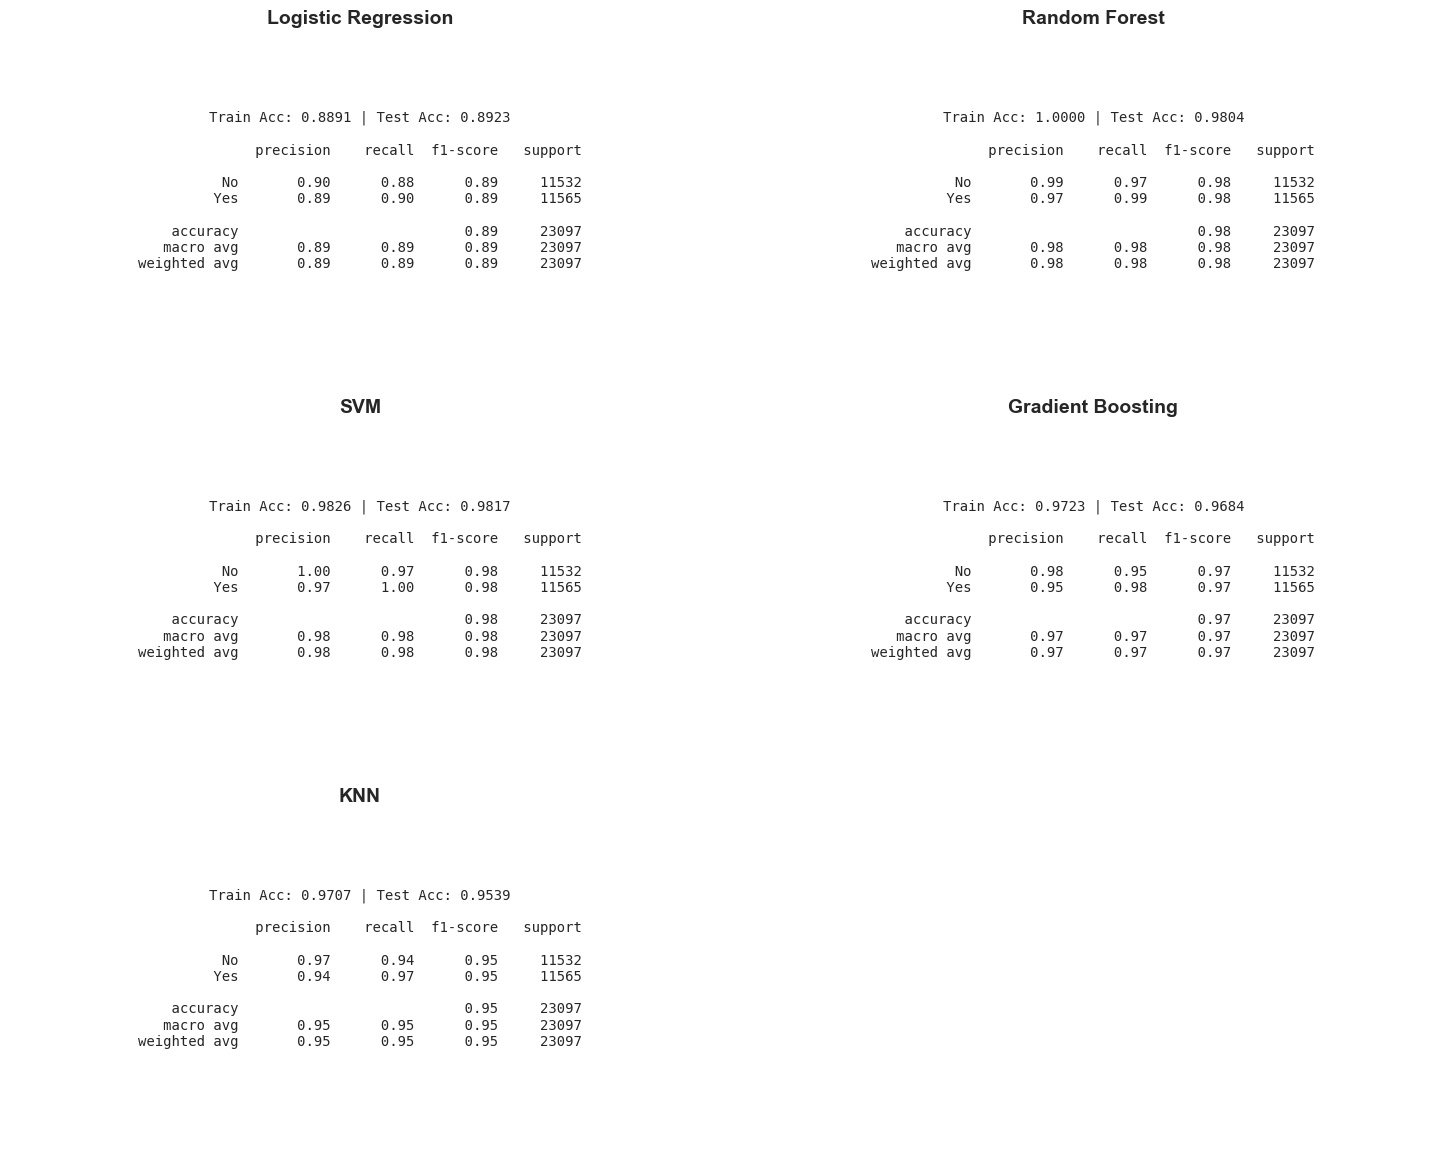

In [107]:
# Defining the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Initializing subplots (3x2 grid for up to 6 models)
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()  # Flatten for easy indexing
# Looping through models
for i, (model_name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)
    # Predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculating training and testing accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Generating the classification report
    report = classification_report(y_test, y_test_pred, target_names=['No', 'Yes'], output_dict=False)

    # Combine the classification report with the accuracies
    report_with_accuracy = f"Train Acc: {train_accuracy:.4f} | Test Acc: {test_accuracy:.4f}\n\n{report}"

    # Display the report in the subplot
    axes[i].text(0.5, 0.5, report_with_accuracy, fontsize=10, va='center', ha='center', family='monospace')
    axes[i].set_title(f"{model_name}", fontsize=14, fontweight="bold")
    axes[i].axis('off')  # Turn off axes for a cleaner look

# Remove any unused subplots
if len(models) < len(axes):
    for j in range(len(models), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout to make sure the gaps are 1 cm apart
plt.subplots_adjust(hspace=1 / 2.54, wspace=1 / 2.54)  # 1 cm = 1/2.54 inch
fig.tight_layout(pad=2.0)  # Add padding around subplots

# Save the plot as a PNG file
fig.savefig("model_reports.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


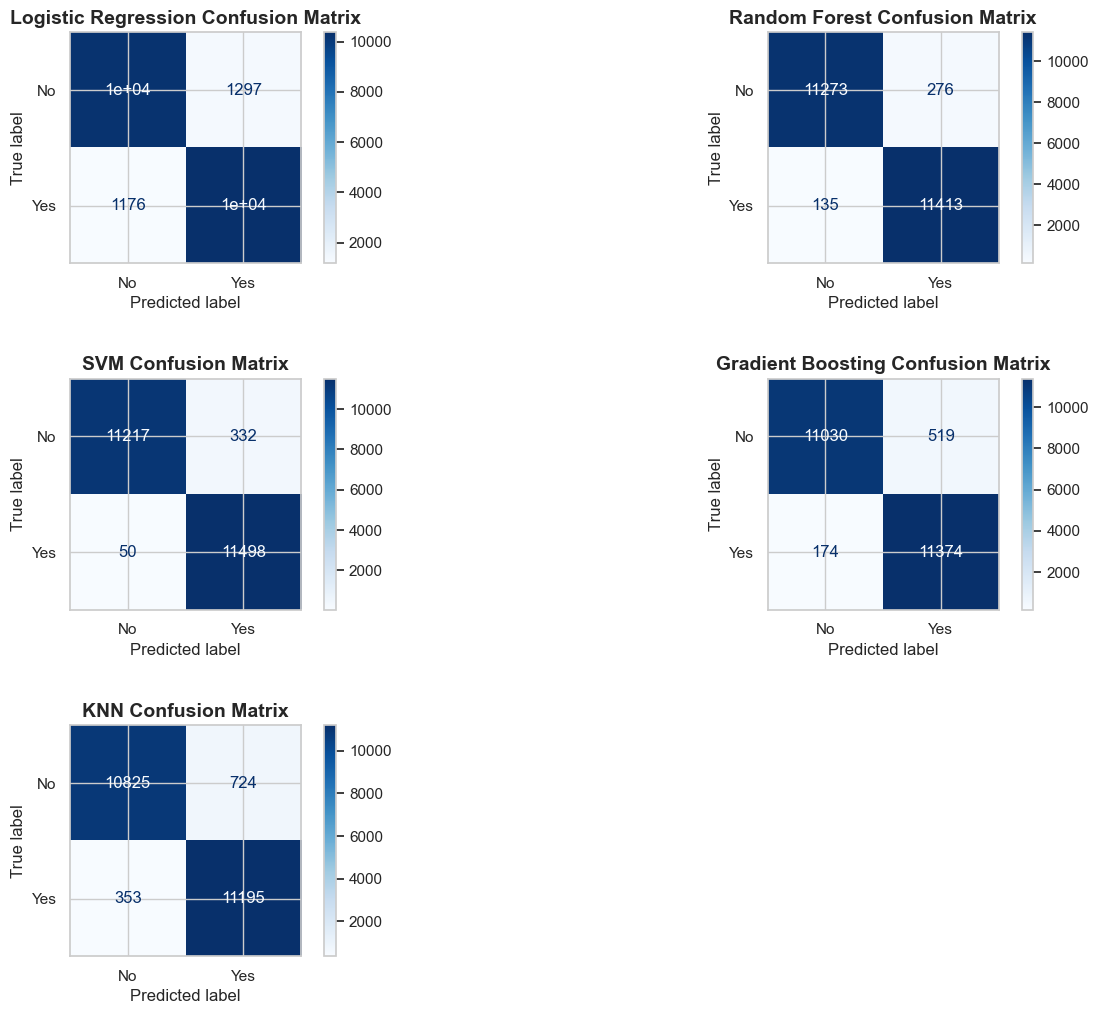

In [102]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Initialize subplots (3x2 grid for up to 6 models)
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()  # Flatten for easy indexing

# Loop through models
for i, (model_name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions for the test set
    y_test_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
    disp.plot(cmap='Blues', ax=axes[i])

    axes[i].set_title(f"{model_name} Confusion Matrix", fontsize=14, fontweight="bold")

# Remove any unused subplots
if len(models) < len(axes):
    for j in range(len(models), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout for a clean look and save the plot
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust gaps to be smaller
fig.savefig("confusion_matrices.png", dpi=300, bbox_inches='tight')  # Save as PNG

# Show the plot
plt.show()


Cross validation using 5 Fold cross validation

In [103]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
# Defining the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Defining the evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Initializing a list to store results
results_list = []

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model_name, model in models.items():
    # Compute mean and std for each metric
    accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring=scoring['accuracy'])
    precision_scores = cross_val_score(model, X, y, cv=kf, scoring=scoring['precision'])
    recall_scores = cross_val_score(model, X, y, cv=kf, scoring=scoring['recall'])
    f1_scores = cross_val_score(model, X, y, cv=kf, scoring=scoring['f1'])

    # Append the results for each model to the list
    results_list.append({
        'Model': model_name,
        'Accuracy Mean': accuracy_scores.mean(),
        'Accuracy Std': accuracy_scores.std(),
        'Precision Mean': precision_scores.mean(),
        'Precision Std': precision_scores.std(),
        'Recall Mean': recall_scores.mean(),
        'Recall Std': recall_scores.std(),
        'F1 Score Mean': f1_scores.mean(),
        'F1 Score Std': f1_scores.std()
    })

# Converting the list to a DataFrame
results = pd.DataFrame(results_list)

# Display the table
print(results)


                 Model  Accuracy Mean  Accuracy Std  Precision Mean  \
0  Logistic Regression           0.89          0.00            0.89   
1                  SVM           0.98          0.00            0.98   
2        Random Forest           0.98          0.00            0.98   
3    Gradient Boosting           0.97          0.00            0.97   
4  K-Nearest Neighbors           0.95          0.00            0.96   

   Precision Std  Recall Mean  Recall Std  F1 Score Mean  F1 Score Std  
0           0.00         0.89        0.00           0.89          0.00  
1           0.00         0.98        0.00           0.98          0.00  
2           0.00         0.98        0.00           0.98          0.00  
3           0.00         0.97        0.00           0.97          0.00  
4           0.00         0.95        0.00           0.95          0.00  


In [104]:
 # Droping the standard deviation columns
results = results.drop(['Accuracy Std', 'Precision Std', 'Recall Std', 'F1 Score Std'], axis=1)

# Display the updated results DataFrame
results


,Model,Accuracy Mean,Precision Mean,Recall Mean,F1 Score Mean
0,Logistic Regression,0.89,0.89,0.89,0.89
1,SVM,0.98,0.98,0.98,0.98
2,Random Forest,0.98,0.98,0.98,0.98
3,Gradient Boosting,0.97,0.97,0.97,0.97
4,K-Nearest Neighbors,0.95,0.96,0.95,0.95


Visualising using bar  graph

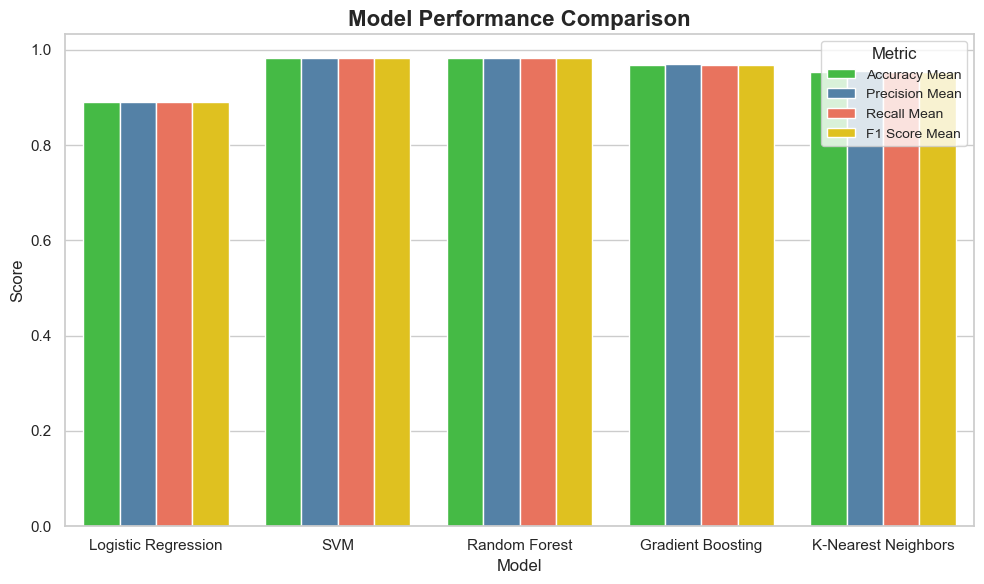

In [105]:

def plot_model_performance(results, save_path="model_performance.png"):
    # Set the style for the plots
    sns.set_theme(style="whitegrid", palette="muted")
    
    # Melt the DataFrame to reshape it for easy plotting
    results_melted = results.melt(
        id_vars='Model', 
        value_vars=['Accuracy Mean', 'Precision Mean', 'Recall Mean', 'F1 Score Mean'],
        var_name='Metric', 
        value_name='Score'
    )
    
    # Define custom colors for the metrics
    metric_colors = ['#32CD32', '#4682B4', '#FF6347', '#FFD700']  # Green, Blue, Red, Yellow
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Model', 
        y='Score', 
        hue='Metric', 
        data=results_melted, 
        palette=metric_colors[:len(results_melted['Metric'].unique())]
    )
    plt.title('Model Performance Comparison', fontsize=16, fontweight="bold")
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    
    # Customize the legend
    plt.legend(title='Metric', fontsize=10)
    # Adjust layout for saving
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig("model summary.png", dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

plot_model_performance(results)


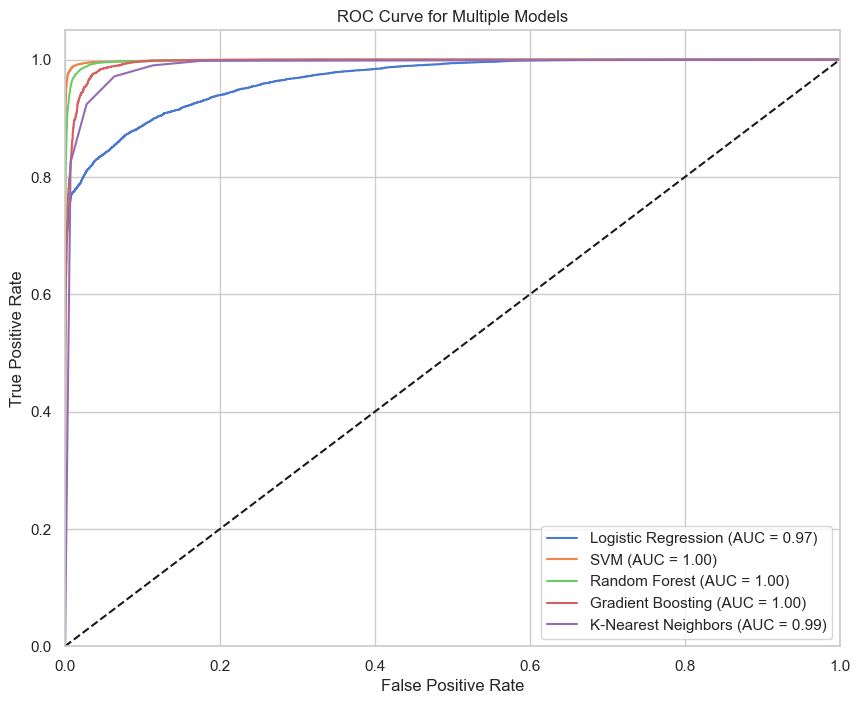

In [106]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

plt.figure(figsize=(10, 8))

# Iterating over models and plot ROC curve for each
for model_name, model in models.items():
    model.fit(X_train, y_train)
    # Get the predicted probabilities
    y_proba = model.predict_proba(X_test)[:, 1]
    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plotting diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Models')
plt.legend(loc="lower right")
plt.show()


Learning cave for all models using for loop

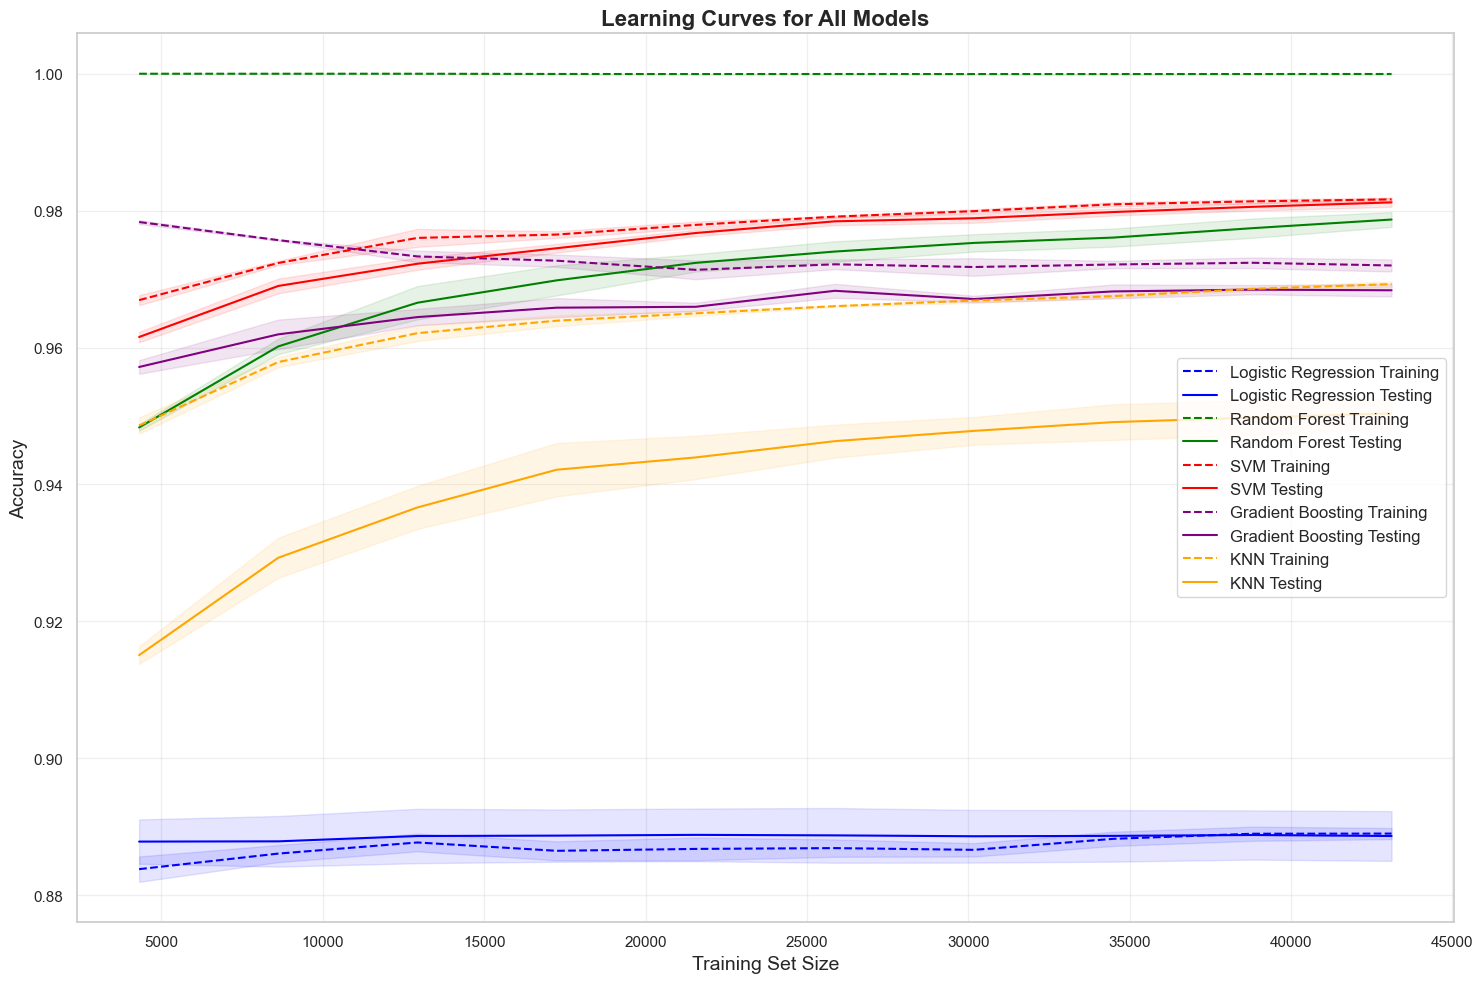

In [108]:
from sklearn.model_selection import learning_curve

# Defining the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Colouring
colors = {
    'Logistic Regression': 'blue',
    'Random Forest': 'green',
    'SVM': 'red',
    'Gradient Boosting': 'purple',
    'KNN': 'orange'
}

# Set up the plot
plt.figure(figsize=(15, 10))

for idx, (model_name, model) in enumerate(models.items()):
    # Compute the learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
   
    adjusted_train_sizes = train_sizes + (idx * 0.03)
    
    # Plotting the training accuracy curve
    plt.plot(adjusted_train_sizes, train_mean, label=f"{model_name} Training", color=colors[model_name], linestyle='--')
    plt.fill_between(adjusted_train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color=colors[model_name])
    
    # Plotting the testing accuracy curve
    plt.plot(adjusted_train_sizes, test_mean, label=f"{model_name} Testing", color=colors[model_name])
    plt.fill_between(adjusted_train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color=colors[model_name])

plt.title("Learning Curves for All Models", fontsize=16, fontweight="bold")
plt.xlabel("Training Set Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.3)

# Save and display the plot
plt.tight_layout()
plt.savefig("learning_curves_all_models.png", format="png", dpi=300)
plt.show()
